#### Problem Statement
The problem is to predict employee attrition. This is a fictional data set created by IBM data scientists. The dataset is taken from the below link:
https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset
    
#### Objective :
Attrition of employees if not predicted correctly can lead to losing valuable people, resulting in reduced efficiency of the organisation, reduced morale among team members etc
Hence it is necessary to correctly predict which employee is likely to leave, ie reduce the number of False Negatives.

## Loading Libraries

In [153]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
import time
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

#pinrt the plot inline in matplotlib
%matplotlib inline

# diaply all the columns
pd.set_option('display.max_columns', None)

## Loading data set

In [154]:
employee = pd.read_csv(r'C:\Users\Benai\Documents\machin-learning\LDA\employee.csv')

In [155]:
# printing the shape of the database
employee.shape

(1470, 35)

In [156]:
# print the firedst five row of the data base
employee.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [157]:
# print some few imformation about database
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [158]:
# print descriptive statistic on numerical columns
employee.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Missing values

In [159]:
#  check for missing values
employee.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## Numerical values

In [160]:
# dataframe of all columns with numerical values
numeric_col = [num_col for num_col in employee.columns if employee[num_col].dtype != 'O']

employee[numeric_col].head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2


## Categorical Variable

In [161]:
# list all the categorical columns
categorical_cols = [cols for cols in employee.columns if employee[cols].dtype == 'O']
categorical_cols
print('The number of categoricl columns are:', len(categorical_cols))

The number of categoricl columns are: 9


In [162]:
# check the first 5 rows of categorical columns
employee[categorical_cols].head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [163]:
# check the number of unique value in each columns
for cols in categorical_cols:
    print('{} has {} categories --> {} \n'.format(cols, len(employee[cols].value_counts()), employee[cols].unique()))

Attrition has 2 categories --> ['Yes' 'No'] 

BusinessTravel has 3 categories --> ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel'] 

Department has 3 categories --> ['Sales' 'Research & Development' 'Human Resources'] 

EducationField has 6 categories --> ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources'] 

Gender has 2 categories --> ['Female' 'Male'] 

JobRole has 9 categories --> ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources'] 

MaritalStatus has 3 categories --> ['Single' 'Married' 'Divorced'] 

Over18 has 1 categories --> ['Y'] 

OverTime has 2 categories --> ['Yes' 'No'] 



In [164]:
le = LabelEncoder()
employee['Attrition']  = le.fit_transform(employee['Attrition'])

employee['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [165]:
employee[categorical_cols] = employee[categorical_cols].apply(LabelEncoder().fit_transform)

In [166]:
employee[categorical_cols].head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,1,2,2,1,0,7,2,0,1
1,0,1,1,1,1,6,1,0,0
2,1,2,1,4,1,2,2,0,1
3,0,1,1,1,0,6,1,0,1
4,0,2,1,3,1,2,1,0,0


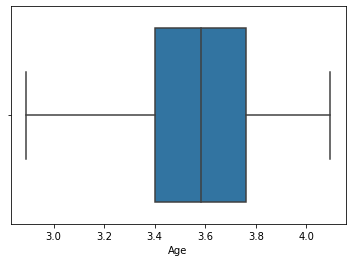

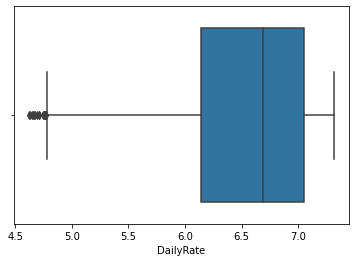

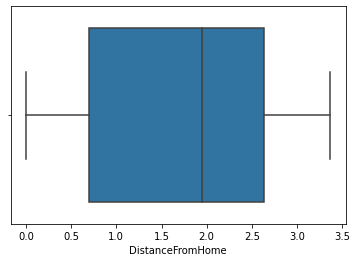

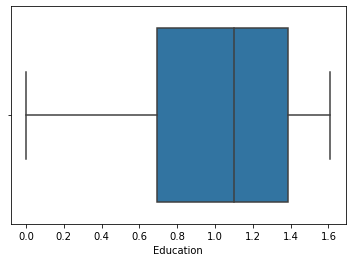

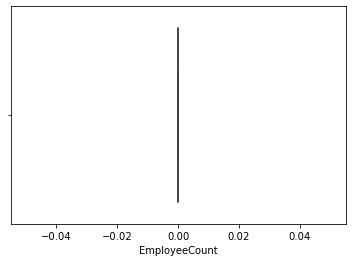

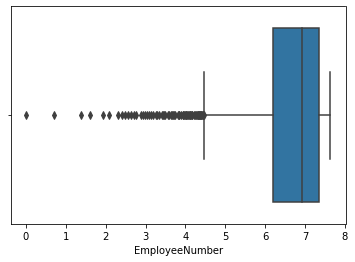

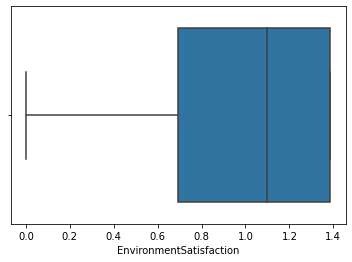

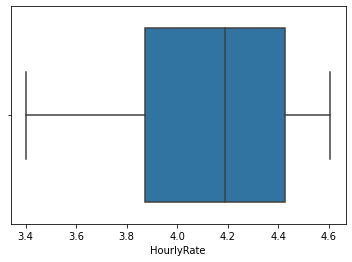

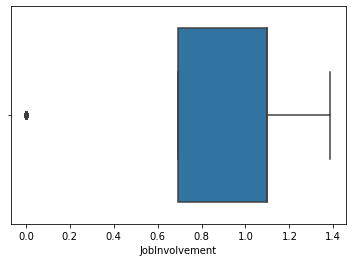

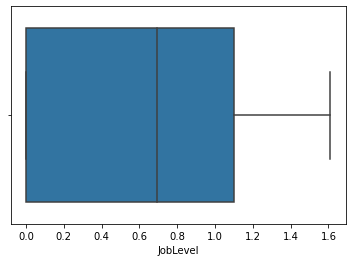

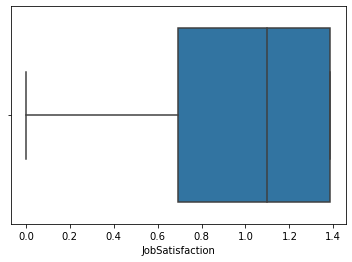

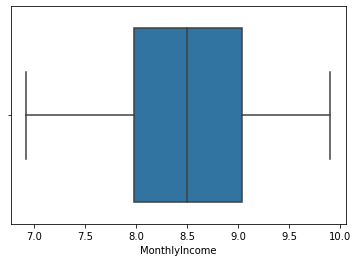

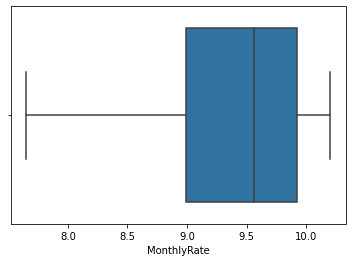

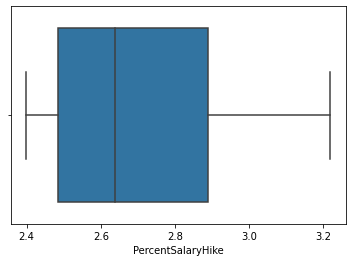

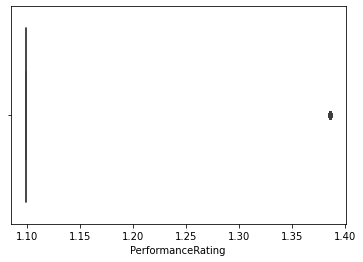

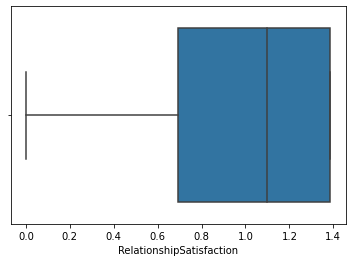

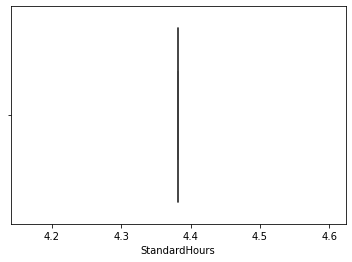

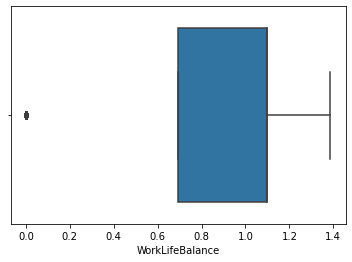

In [167]:
# vislualize the outliers

for cols in continouse_cols:
    house_df_copy = employee.copy(deep=True)
    
    if 0 in house_df_copy[cols].unique():
        pass
    else:
        house_df_copy[cols]= np.log(house_df_copy[cols])
#         house_df_copy.boxplot(column=cols)
        sns.boxplot(house_df_copy[cols])
        plt.show()

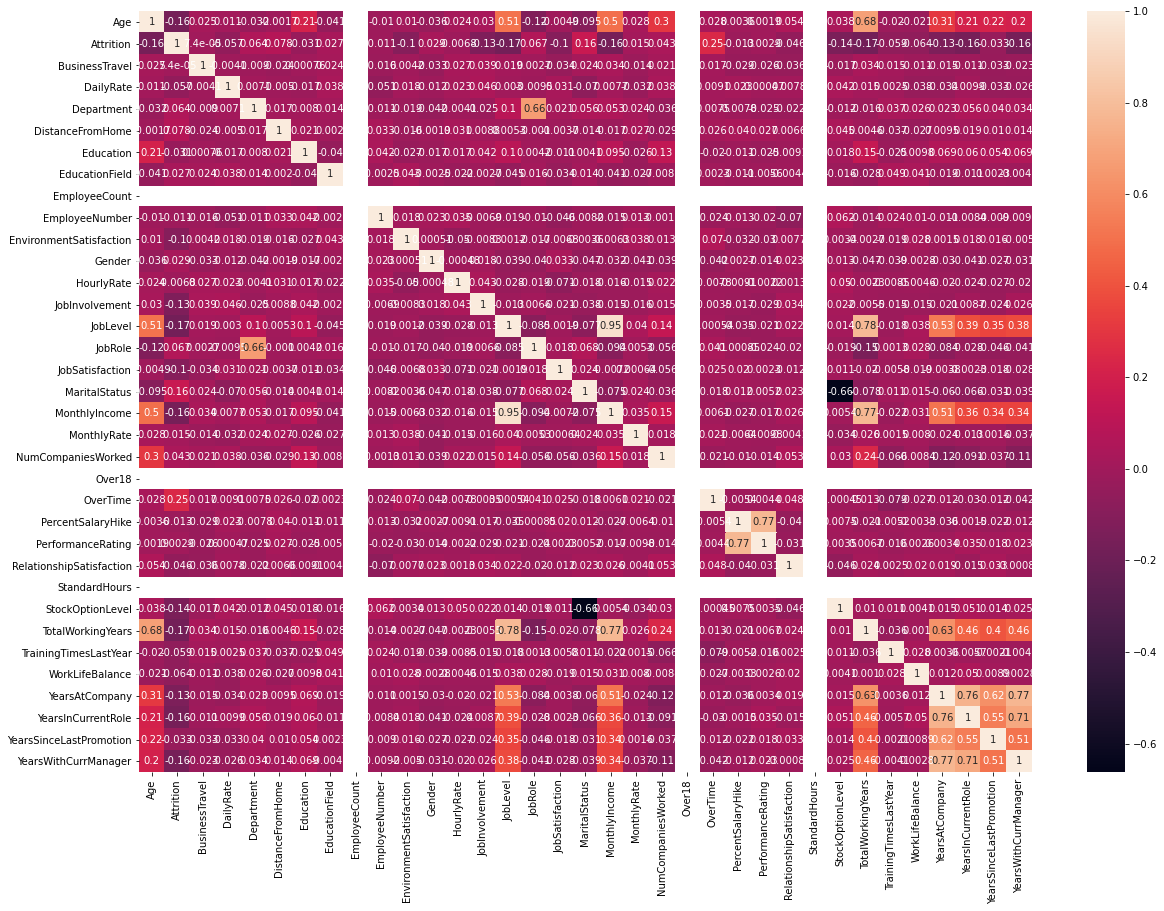

In [168]:
plt.figure(figsize=(20,14))
sns.heatmap(employee.corr(),yticklabels=True,cbar=True,linewidths=0, annot=True)
plt.show()

In [169]:
corr1 = employee.corr().abs()
corr1[corr1 == 1] = 0
corr_cols = corr1.unstack().sort_values(ascending=False).drop_duplicates()

corr_df = pd.DataFrame(corr_cols[corr_cols > 0.75])
corr_df

,,0
MonthlyIncome,JobLevel,0.950300
TotalWorkingYears,JobLevel,0.782208
PerformanceRating,PercentSalaryHike,0.773550
MonthlyIncome,TotalWorkingYears,0.772893
YearsWithCurrManager,YearsAtCompany,0.769212
YearsAtCompany,YearsInCurrentRole,0.758754


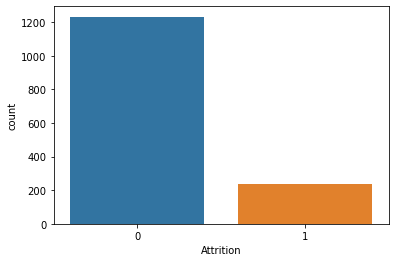

In [170]:
sns.countplot(employee['Attrition'])
plt.show()


In [171]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null int64
BusinessTravel              1470 non-null int32
DailyRate                   1470 non-null int64
Department                  1470 non-null int32
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null int32
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null int32
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null int32
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null int32
MonthlyIncome               1

## split target  and predictor

In [172]:
X = employee.drop('Attrition', axis=1)
y = employee['Attrition']

## KNN - Base Model

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state = 0)

In [174]:
sc1 = StandardScaler()
X_train_sc = sc1.fit_transform(X_train)
X_test_sc = sc1.transform(X_test)

### Calculating value of n_neighbors at which error is minimum

In [175]:
test_error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i,algorithm='brute', weights='distance')
    knn.fit(X_train_sc,y_train)
    pred_test_i = knn.predict(X_test_sc)
    test_error_rate.append(np.mean(pred_test_i != y_test))

Text(0, 0.5, 'Error Rate')

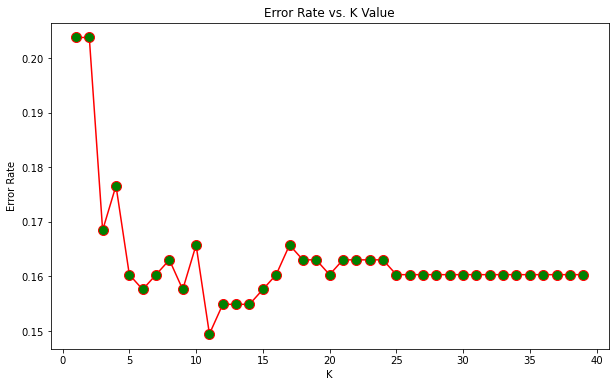

In [176]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),test_error_rate,color='red', linestyle='-', marker='o',markerfacecolor='green', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### Error seems minimum at K=10

In [177]:
%%time
knn = KNeighborsClassifier(n_neighbors=10,weights='distance',algorithm='auto', p=3)

knn.fit(X_train_sc,y_train)

Wall time: 20 ms


KNeighborsClassifier(n_neighbors=10, p=3, weights='distance')

In [178]:
pred = knn.predict(X_test_sc)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[308   1]
 [ 57   2]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       309
           1       0.67      0.03      0.06        59

    accuracy                           0.84       368
   macro avg       0.76      0.52      0.49       368
weighted avg       0.82      0.84      0.78       368



In [179]:
print(accuracy_score(y_test, pred))

0.842391304347826


### LDA - Base Model (As a classification model)

In [180]:
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [181]:
sc2 = StandardScaler()
X_train_clf = sc2.fit_transform(X_train_clf)
X_test_clf = sc2.transform(X_test_clf)

In [191]:
%%time
lda_0 = LDA()
lda_0.fit(X_train_sc, y_train)
y_test_pred_0 = lda_0.predict(X_test_sc)

Wall time: 18 ms


In [183]:
print(confusion_matrix(y_test, y_test_pred_0))
print(classification_report(y_test, y_test_pred_0))

[[299  10]
 [ 37  22]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       309
           1       0.69      0.37      0.48        59

    accuracy                           0.87       368
   macro avg       0.79      0.67      0.71       368
weighted avg       0.86      0.87      0.86       368



In [184]:
print(accuracy_score(y_test_pred_0, y_test))

0.8722826086956522


### KNN + LDA (Using LDA to transform the data and then using KNN)

In [185]:
X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(X, y, test_size = 0.25, stratify=y, random_state = 0)

In [186]:
#Transformation by LDA
lda_1 = LDA(n_components = 1, solver='eigen', shrinkage='auto')
X_train_lda = lda_1.fit_transform(X_train_lda, y_train_lda)
X_test_lda = lda_1.transform(X_test_lda)

In [187]:
# feature scaling
sc3 = StandardScaler()
X_train_lda_sc = sc3.fit_transform(X_train_lda)
X_test_lda_sc = sc3.transform(X_test_lda)

In [188]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_lda_sc,y_train_lda)
    pred_i = knn.predict(X_test_lda_sc)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

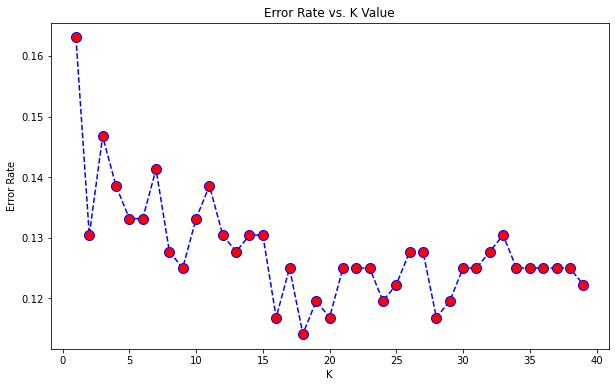

In [189]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [190]:
%%time
knn = KNeighborsClassifier(n_neighbors=18,weights='distance',algorithm='auto', p=3)

knn.fit(X_train_lda_sc,y_train_lda)

Wall time: 4 ms


KNeighborsClassifier(n_neighbors=18, p=3, weights='distance')

In [192]:
pred = knn.predict(X_test_lda_sc)

print(confusion_matrix(y_test_lda,pred))
print(classification_report(y_test_lda,pred))

[[292  17]
 [ 35  24]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       309
           1       0.59      0.41      0.48        59

    accuracy                           0.86       368
   macro avg       0.74      0.68      0.70       368
weighted avg       0.84      0.86      0.85       368



In [193]:
print(accuracy_score(y_test, pred))

0.8586956521739131
